[[ 2.02325098e-03 -1.16027443e-02  5.29871173e-02 ... -9.04626650e-03
   2.10358329e-02  2.15179135e-02]
 [-1.97584066e-02 -7.60455894e-02 -5.24486095e-03 ...  1.01996718e-03
   7.48321679e-02 -3.80225732e-02]
 [-1.32190298e-02 -5.10624117e-02 -4.41465606e-03 ...  2.71527035e-02
  -1.59206483e-02  6.23926047e-02]
 ...
 [ 2.03143196e-02  1.36838982e-02 -6.99270702e-03 ... -3.43835384e-02
  -8.07605498e-03 -2.92039362e-02]
 [-2.96586125e-05 -1.85507262e-02  1.16463465e-02 ... -4.29636890e-02
   4.53070991e-02 -5.36317130e-02]
 [ 4.65938610e-02  2.60523816e-02 -2.26438432e-02 ...  2.69088251e-02
  -4.25082388e-02  2.91451480e-04]]
Taget number is:  7


array([[0.03890271],
       [0.03792478],
       [0.04809886],
       [0.05230116],
       [0.04549462],
       [0.95692497],
       [0.04257726],
       [0.04536714],
       [0.04990384],
       [0.03619971]])

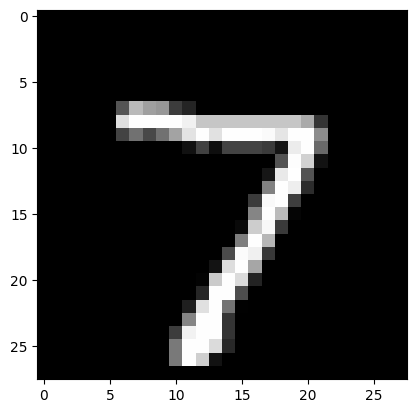

In [7]:

import numpy as np
from scipy.special import expit, logit
import matplotlib.pyplot as plt


class NeuralNetwork:

    # راه اندازی شبکه عصبی 
    def __init__(self, input_nodes, hidden_nodes, output_nodes, learning_rate):
        # تعیین تعداد نورون‌های لایه‌های مختلف
        self.input_nodes = input_nodes
        self.hidden_nodes = hidden_nodes
        self.output_nodes = output_nodes

        # تعیین نرخ یادگیری
        self.learning_rate = learning_rate
        
        # ایجاد تابع فعال سازی که اینجا سیگموییدی است ولی می تواند متفاوت باشد
        self.activation_function = lambda x : expit(x)


        # ایجاد دو ماتریس وزن‌های اولیه
        # یکی برای وزن‌های بین لایه ورودی و مخفی و یکی برای وزن‌های بین لایه مخفی و خروجی 
        # هر وزن با ایندکس آی و جی، وزن اتصال بین نورون آی از لایه مبدا به نورون جی در لایه مقصد است.
        #  و به همین ترتیب w12 w21 مثلا
        self.w_i_h = np.random.default_rng().normal(0, pow(self.input_nodes, -0.5),
                                                    (self.hidden_nodes, self.input_nodes))
        self.w_h_o = np.random.default_rng().normal(0, pow(self.hidden_nodes, -0.5),
                                                    (self.output_nodes, self.hidden_nodes))
        pass


        # یادگیری شبکه بر اساس یک نمونه ورودی/خروجی - پس انتشار
    def train(self, input_list, targets_list):
        # محاسبه سیگنال‌های ورودی و خروجی لایه‌ها
        inputs = np.array(input_list, ndmin=2).T

        x_hidden = np.dot(self.w_i_h, inputs)
        o_hidden = self.activation_function(x_hidden)

        x_output = np.dot(self.w_h_o, o_hidden)
        o_output = self.activation_function(x_output)

        #محاسبه خطای شبکه بر اساس اختلاف خروجی با هدف‌ها
        targets = np.array(targets_list, ndmin=2).T
        output_errors = targets - o_output
        #پس انتشار خطای شبکه روی نورون‌های لایه مخفی
        hidden_errors = np.dot(self.w_h_o.T, output_errors)

        # محاسبه وزن‌های جدید اتصال‌ها با گرادیان کاهشی
        self.w_h_o += self.learning_rate * np.dot((output_errors * o_output * (1-o_output)), o_hidden.T)
        self.w_i_h += self.learning_rate * np.dot((hidden_errors * o_hidden * (1-o_hidden)), inputs.T)
       

    # محاسبه خروجی شبکه با دادن ورودی - پیش خور
    def query(self, input_list):
        # تبدیل لیست مقادیر ورودی به آرایه دوبعدی
        inputs = np.array(input_list, ndmin=2).T

        # محاسبه سیگنال ورودی و سپس خروجی لایه مخفی
        x_hidden = np.dot(self.w_i_h, inputs)
        o_hidden = self.activation_function(x_hidden)

        # محاسبه سیگنال ورودی و سپس خروجی لایه خروجی
        x_output = np.dot(self.w_h_o, o_hidden)
        o_output = self.activation_function(x_output)

        return o_output

input_nodes = 784
hidden_nodes = 100
output_nodes = 10
learning_rate = 0.3

nn = NeuralNetwork(input_nodes=input_nodes, hidden_nodes=hidden_nodes, output_nodes= output_nodes, learning_rate=learning_rate)
train = open(r"C:\Users\Asus\Desktop\mnist_train_100.csv",'r')
train_list = train.readlines()
train.close()
train_list[0]
row_data = train_list[0].split(',')

for row in train_list :
    row_data = train_list[0].split(',')
    scale_input = (np.asarray(row_data[1:], dtype= np.float32) / (255.0 * 0.99 )) + 0.01
    neoron_output = 10
    scale_target = np.zeros(output_nodes) + 0.01
    scale_target [int(row_data[0])] = 0.99
    nn.train(scale_input,scale_target)
 
print(nn.w_i_h)    

test_file = open(r"C:\Users\Asus\Desktop\mnist_test_10.csv",'r')
test_list = test_file.readlines()
test_file.close()

test_row_data = test_list[0].split(',')
print("Taget number is: ", test_row_data[0])
image_data = np.asarray(test_row_data[1:],dtype= np.float32 ).reshape((28,28))
image = plt.imshow(image_data, cmap='grey')

nn.query(( np.asarray(test_row_data[1:], dtype=np.float32 )/(255.0 * 0.98)) + 0.01)

     

AxesImage(shape=(28, 28))


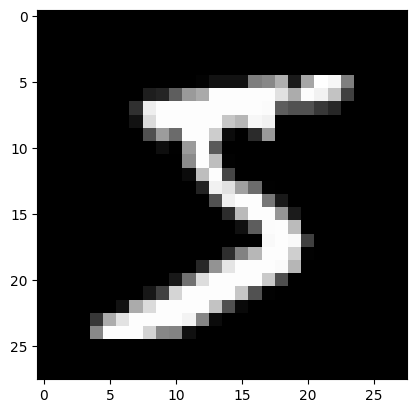

In [8]:
from numpy import *
import matplotlib.pyplot as plt
train = open(r"C:\Users\Asus\Desktop\mnist_train_100.csv",'r')
train_list = train.readlines()
train.close()
train_list[0]
row_data = train_list[0].split(',')
#print(row_data)
# row-data is a python list now so we ave to change it to numpy list
image_data = np.asarray(row_data[1:], dtype= np.float32).reshape((28,28))
#print(image_data) 
images = plt.imshow( image_data, cmap= 'grey')
print(images)

In [9]:
scale_input = (np.asarray(row_data[1:], dtype= np.float32) / (255.0 * 0.99 )) + 0.01
neoron_output = 10
scale_target = np.zeros(output_nodes) + 0.01
scale_target [int(row_data[0])] = 0.99
print(scale_target)

[0.01 0.01 0.01 0.01 0.01 0.99 0.01 0.01 0.01 0.01]
